<a href="https://colab.research.google.com/github/shashwatb23/Week-2-/blob/main/RF_and_DT_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data = pd.read_csv('spotify Edited.csv')
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66.0,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6.0,-2.634,1.0,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67.0,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11.0,-4.969,1.0,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70.0,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-3.432,0.0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60.0,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7.0,-3.778,1.0,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69.0,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-4.672,1.0,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0


Decision Tree Model

|--- feature_8 <= 7.50
|   |--- feature_8 <= 5.50
|   |   |--- feature_8 <= 3.50
|   |   |   |--- feature_8 <= 2.50
|   |   |   |   |--- feature_8 <= 1.50
|   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |--- class: album rock
|   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |--- class: classic rock
|   |   |   |   |--- feature_8 >  1.50
|   |   |   |   |   |--- class: dance pop
|   |   |   |--- feature_8 >  2.50
|   |   |   |   |--- class: electropop
|   |   |--- feature_8 >  3.50
|   |   |   |--- feature_8 <= 4.50
|   |   |   |   |--- class: gangster rap
|   |   |   |--- feature_8 >  4.50
|   |   |   |   |--- class: hip hop
|   |--- feature_8 >  5.50
|   |   |--- feature_8 <= 6.50
|   |   |   |--- class: indie poptimism
|   |   |--- feature_8 >  6.50
|   |   |   |--- class: post-teen pop
|--- feature_8 >  7.50
|   |--- feature_8 <= 8.50
|   |   |--- class: southern hip hop
|   |--- feature_8 >  8.50
|   |   |--- class: trap



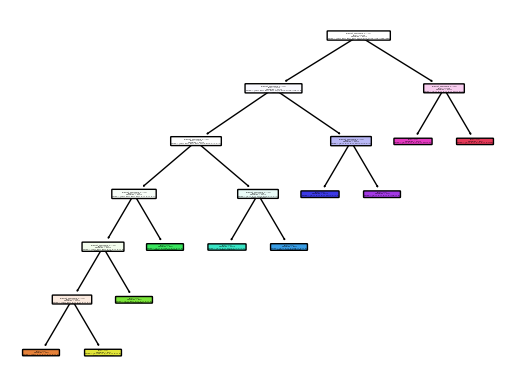

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.preprocessing import LabelEncoder


data = data.dropna()
Y = data.iloc[:,10]

de = data
de = de.drop(['track_id','playlist_genre'] , axis = 1)
X = de.iloc[:,:]
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Modify how you handle the target variable 'Y'
if Y.dtype != 'object':
    # Use pd.cut to discretize 'Y' into a suitable number of bins
    Y = pd.cut(Y, bins=5, labels=False)  # Adjust 'bins' as needed
    # Ensure 'Y' is of type 'category' for classification
    Y = Y.astype('category')

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state=1234)  # Fixed order of train/test splits

model = DecisionTreeClassifier(random_state = 1234567)
model.fit(Xtrain, Ytrain)

decPlot = plot_tree(decision_tree=model, feature_names=X.columns, class_names=Y.unique(), filled=True , rounded = True)
tect_representation = tree.export_text(model)
print(tect_representation)


Accuracy of model

In [27]:
y_pred = model.predict(Xtest)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Ytest, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0
